<Axes: xlabel='distance_km', ylabel='fare_amount'>

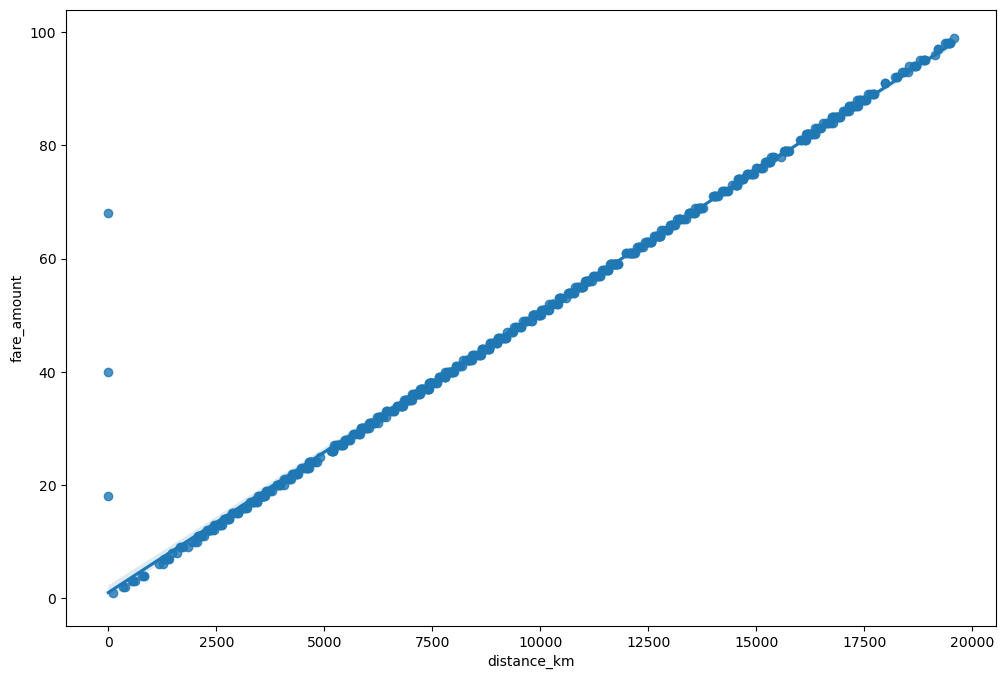

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

# 데이터 주소
DATA_PATH = r"C:\Users\302-28\pratice\Exam-250314\250314-Exam2\data\taxi_fare_data.csv"

#데이터를 DataFram의 형태로 불러옵니다.
def load_csv(path):
    data_frame = pd.read_csv(path)
    return data_frame

# 결측치 처리 함수입니다.
def del_missing(df):
    
    # df에서 Unnamed: 0 feature 데이터를 제거하고 del_un_df에 저장합니다.
    del_un_df = df.drop(['Unnamed: 0'], axis='columns')
    
    # del_un_df에서 id feature 데이터를 제거하고 del_un_id_df에 저장합니다.
    del_un_id_df = del_un_df.drop(['id'], axis='columns')
    
    # del_un_id_df의 누락된 데이터가 있는 행을 제거하고 removed_df에 저장합니다.
    removed_df = del_un_id_df.dropna()
    
    return removed_df

# 리스트를 입력으로 받아서 해당 리스트 내에 음수값이 있으면 그 위치(인덱스)들을 리스트로 출력하는 함수를 만듭니다.
def get_negative_index(list_data):
    neg_idx = []
    
    for i, value in enumerate(list_data):
        if value < 0:
            neg_idx.append(list_data.index[i]) # 왜 i가 아닌지?? list_data.index[i]는 i값이 위치한 인덱스값을 얻는거 아닌지?
            
    return neg_idx

# DataFrame 내에 제거해야 하는 이상치의 인덱스를 반환하는 함수를 만듭니다.
def outlier_index():
    # get_negative_index() 함수를 통해서, fare_amount와 passenger_count 내의 음수값들의 인덱스를 반환합니다.
    idx_fare_amount = get_negative_index(fare_amount)
    idx_passenger_count = get_negative_index(passenger_count)
    
    idx_zero_distance = []    
    idx = [i for i in range(len(passenger_count))]
    zipped = zip(idx, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude)
    
    for i, x, y, _x, _y in zipped:
        # 타는 곳(pickup_longitude,pickup_latitude)과 내리는 곳(drop_longitude, drop_latitude)이 같은 데이터의 인덱스를 idx_zero_distance에 저장합니다.
        if (x == _x) and (y == _y):
            idx_zero_distance.append(i)
            
    total_index4remove = list(set(idx_fare_amount+idx_passenger_count+idx_zero_distance))
    
    return total_index4remove

# 인덱스를 기반으로 DataFrame 내의 데이터를 제거하고, 제거된 DataFrame을 반환하는 함수를 만듭니다.
def remove_outlier(dataframe, list_idx):
    return dataframe.drop(list_idx)

# load_csv 함수를 사용하여 데이터를 불러와 df에 저장합니다.
df = load_csv(DATA_PATH)

# 1-1. del_missing 함수로 df의 결측치을 처리하여 df에 덮어씌웁니다.
df = del_missing(df)

# 불러온 DataFrame의 각 인덱스의 값들을 변수로 저장합니다.
fare_amount = df['fare_amount']
passenger_count = df['passenger_count']
pickup_longitude = df['pickup_longitude']
pickup_latitude = df['pickup_latitude']
dropoff_longitude = df['dropoff_longitude']
dropoff_latitude = df['dropoff_latitude']

# 1-2. remove_outlier()을 사용하여 이상치를 제거합니다.
# remove_outlier()가 어떤 인자들을 받는지 확인하세요.
remove_index = outlier_index()
df = remove_outlier(df,remove_index)

def haversine(lat1, lon1, lat2, lon2):
    # 위도, 경도를 라디안으로 변환
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine 공식을 사용하여 거리 계산
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    
    # 지구의 반지름 (단위: km)
    R = 6371.0
    
    # 거리 계산 (단위: km)
    distance = R * c
    return distance

df['distance_km'] = df.apply(lambda df: haversine(df['pickup_latitude'], df['pickup_longitude'],
                                                   df['dropoff_latitude'], df['dropoff_longitude']), axis=1)


plt.figure(figsize=(12, 8))
sns.regplot(x='distance_km', y='fare_amount', data=df)
# 경도,위도 == -180~180 , -90~90 인데 경도 위도 측정값들이 이상함

In [2]:
mask =df['distance_km']== 0
df[mask]

,pickup_datetime,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,passenger_count,fare_amount,distance_km
121,2017-07-05 8:19,-476,-31,-476.0,-31.0,3,40,0.0
122,2015-11-09 8:43,-350,-428,-350.0,-428.0,5,18,0.0
135,2017-02-23 20:38,-199,486,-199.0,486.0,0,68,0.0


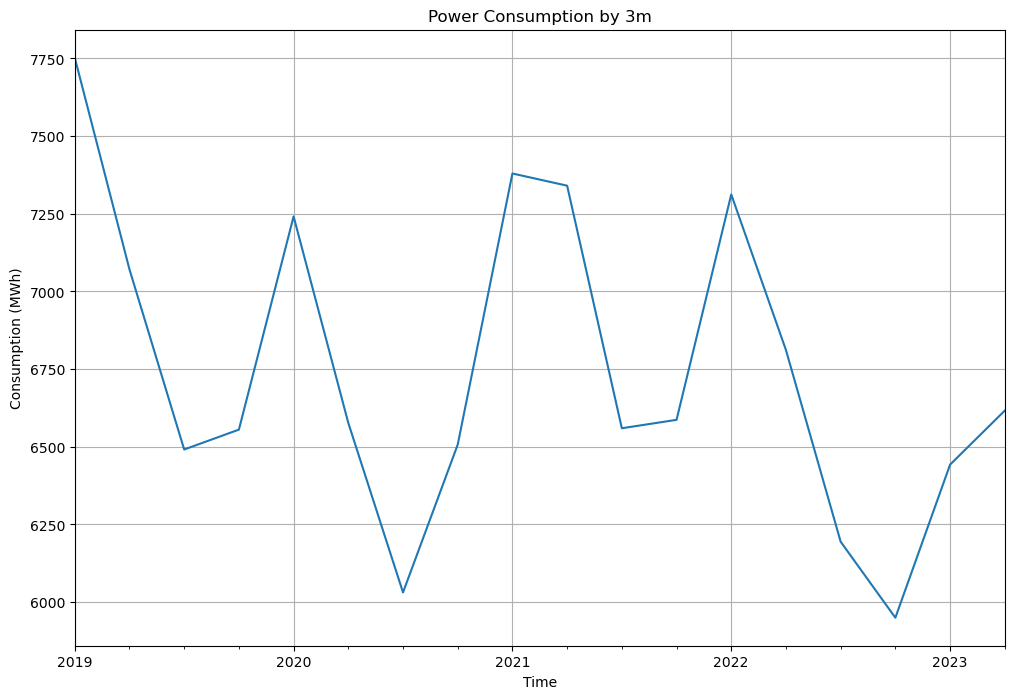

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data_path = r"C:\Users\302-28\pratice\Exam-250314\250314-Exam2\data\electronic.csv" 

df = pd.read_csv(data_path)

df['DateTime'] = pd.to_datetime(df['DateTime'])

df.set_index('DateTime', inplace=True)

df_mon = df.resample('3ME').mean()  

plt.figure(figsize=(12, 8))
df_mon['Consumption'].plot(title='Power Consumption by 3m')
plt.xlabel('Time')
plt.ylabel('Consumption (MWh)')
plt.grid(True)
plt.show()